<a href="https://colab.research.google.com/github/TaoIzzo/UDLAP/blob/main/Proyecto_de_Medio_Semestre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga de datos y librerias

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importacion de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importar archivo desde drive y kaggle
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d dipam7/student-grade-prediction

student-grade-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!kaggle datasets download -d dipam7/student-grade-prediction

student-grade-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip student-grade-prediction.zip

Archive:  student-grade-prediction.zip
replace student-mat.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: student-mat.csv         


In [ ]:
#Asignar a la variable los datos exportados
datakaggle = pd.read_csv("student-mat.csv")

# Exploracion de datos

In [ ]:
# se extraen las primeras 5 filas para ver los datos y emepzar a hacer el EDA
datakaggle.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
""" ¿Cuales son las columnas?
El nombre de las columnas nos empieza a familiarizar con los datos que trataremos"""
datakaggle.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
""" ¿De que tamaño es nuestra base de datos?
La dimemsion de nuestros datos es relevante debido al tratado que se le pueden dar a los datos dependiendo de eso 
"""
datakaggle.shape

(395, 33)

In [ ]:
""" ¿De que tipo es cada columna?
A partir de aqui empieza el verdadero trabajo, dependiendo del tipo de dato que tengamos podremos empezar a trabajar, el object se refiere a tipo string en pandas, sin embargo, sera necesario corroborar de que efectivamente sean strings, si una columna numerica contiene en una sola fila un dato de tipo
string, toda la columna nos marcara object 
"""
datakaggle.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [ ]:
datakaggle.select_dtypes(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


Se puede obsercar que la amyoria de las columnas object son en si categoricas

In [ ]:
"""¿Que datos contiene cada columna?
Se agruparan todas las columnas y se extraeran los datos, con el fin de saber que tan variados son o cunatas categorias hay en cada columna. En caso de que haya mucha variacion,c omop lo puede ser con un ID, estos no aportaran gran informacion.
"""
for col in datakaggle.columns:
    print("-"*20 + col+"-"*20)
    display(datakaggle[col].value_counts())

--------------------school--------------------


GP    349
MS     46
Name: school, dtype: int64

--------------------sex--------------------


F    208
M    187
Name: sex, dtype: int64

--------------------age--------------------


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

--------------------address--------------------


U    307
R     88
Name: address, dtype: int64

--------------------famsize--------------------


GT3    281
LE3    114
Name: famsize, dtype: int64

--------------------Pstatus--------------------


T    354
A     41
Name: Pstatus, dtype: int64

--------------------Medu--------------------


4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64

--------------------Fedu--------------------


2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64

--------------------Mjob--------------------


other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

--------------------Fjob--------------------


other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

--------------------reason--------------------


course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

--------------------guardian--------------------


mother    273
father     90
other      32
Name: guardian, dtype: int64

--------------------traveltime--------------------


1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64

--------------------studytime--------------------


2    198
1    105
3     65
4     27
Name: studytime, dtype: int64

--------------------failures--------------------


0    312
1     50
2     17
3     16
Name: failures, dtype: int64

--------------------schoolsup--------------------


no     344
yes     51
Name: schoolsup, dtype: int64

--------------------famsup--------------------


yes    242
no     153
Name: famsup, dtype: int64

--------------------paid--------------------


no     214
yes    181
Name: paid, dtype: int64

--------------------activities--------------------


yes    201
no     194
Name: activities, dtype: int64

--------------------nursery--------------------


yes    314
no      81
Name: nursery, dtype: int64

--------------------higher--------------------


yes    375
no      20
Name: higher, dtype: int64

--------------------internet--------------------


yes    329
no      66
Name: internet, dtype: int64

--------------------romantic--------------------


no     263
yes    132
Name: romantic, dtype: int64

--------------------famrel--------------------


4    195
5    106
3     68
2     18
1      8
Name: famrel, dtype: int64

--------------------freetime--------------------


3    157
4    115
2     64
5     40
1     19
Name: freetime, dtype: int64

--------------------goout--------------------


3    130
2    103
4     86
5     53
1     23
Name: goout, dtype: int64

--------------------Dalc--------------------


1    276
2     75
3     26
5      9
4      9
Name: Dalc, dtype: int64

--------------------Walc--------------------


1    151
2     85
3     80
4     51
5     28
Name: Walc, dtype: int64

--------------------health--------------------


5    146
3     91
4     66
1     47
2     45
Name: health, dtype: int64

--------------------absences--------------------


0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
16      7
7       7
5       5
18      5
20      4
11      3
9       3
13      3
15      3
22      3
1       3
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: absences, dtype: int64

--------------------G1--------------------


10    51
8     41
11    39
7     37
12    35
13    33
9     31
14    30
15    24
6     24
16    22
18     8
17     8
5      7
19     3
4      1
3      1
Name: G1, dtype: int64

--------------------G2--------------------


9     50
10    46
12    41
13    37
11    35
15    34
8     32
14    23
7     21
5     15
6     14
16    13
0     13
18    12
17     5
19     3
4      1
Name: G2, dtype: int64

--------------------G3--------------------


10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: G3, dtype: int64

In [ ]:
"""¿Cuantos valores unicos contiene cada columna?
La funcion nunquite nos permite saber cuantos valores diferentes hay en cada columna, es similar a lo que se hizo anteriormente, 
con la diferencias de que aqui solo extraemos el numero de valores unicos y no cuales son, con el proposito de saber que grafica puede representar la columna de mejor manera
   """
datakaggle.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

Como se puede observar, hay muchos tipos de ausencia, representar estos datos sera complicado, lo mejor sera ver el tipo de ausencias dependiendo del tipo de escuela, con el fin de disminuir los 34 posibles valores que hay, enm tanto a G1,G2 Y G3, son calificaciones, por lo que no sera complicado graficarlo, pero estas se pueden reducir solo a 10 tipos (20/2) para tenerlos mejor representados. 

# limpieza y duplicados

In [ ]:
""" ¿Hay valores nulos?
En caso de haber valores nulos con datos numericos se pueden sustituir con la media y en categoricos con la moda (tambien se podria con modelos pero seria mas adalante)
"""
datakaggle.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
"""¿Hay datos uplicados?
Se buscaran datos en general, con ello me quiero referir a datos que sean exactos en todas las columnas debido a que no hay nombres ni id, por lo cual se asumen que todos los datos son unicos, que no se registro o tomo en cuenta a una persona dos veces
"""
datakaggle[datakaggle.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


# Transformacion

In [ ]:
# Se transforman las calificaciones para que solo esten entre 0 y 10
datakaggle[["G1","G2","G3"]] = datakaggle[["G1","G2","G3"]].apply(lambda x: x/2)

In [ ]:
datakaggle

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,2.5,3.0,3.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,2.5,2.5,3.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,3.5,4.0,5.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,7.5,7.0,7.5
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,4.5,4.5,4.5
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,7.0,8.0,8.0
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,5.0,4.0,3.5
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,5.5,6.0,5.0


# Graficacion

## librerias

In [ ]:
#Libreiras de graficacion
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pywaffle import Waffle   

## Correlacion de variables
¿Que variables estan correlacionadas?
la correlacion de variables nos ayudara a enfocarnos en aquellos datos que influyen sobre otros

<Figure size 1080x1080 with 0 Axes>

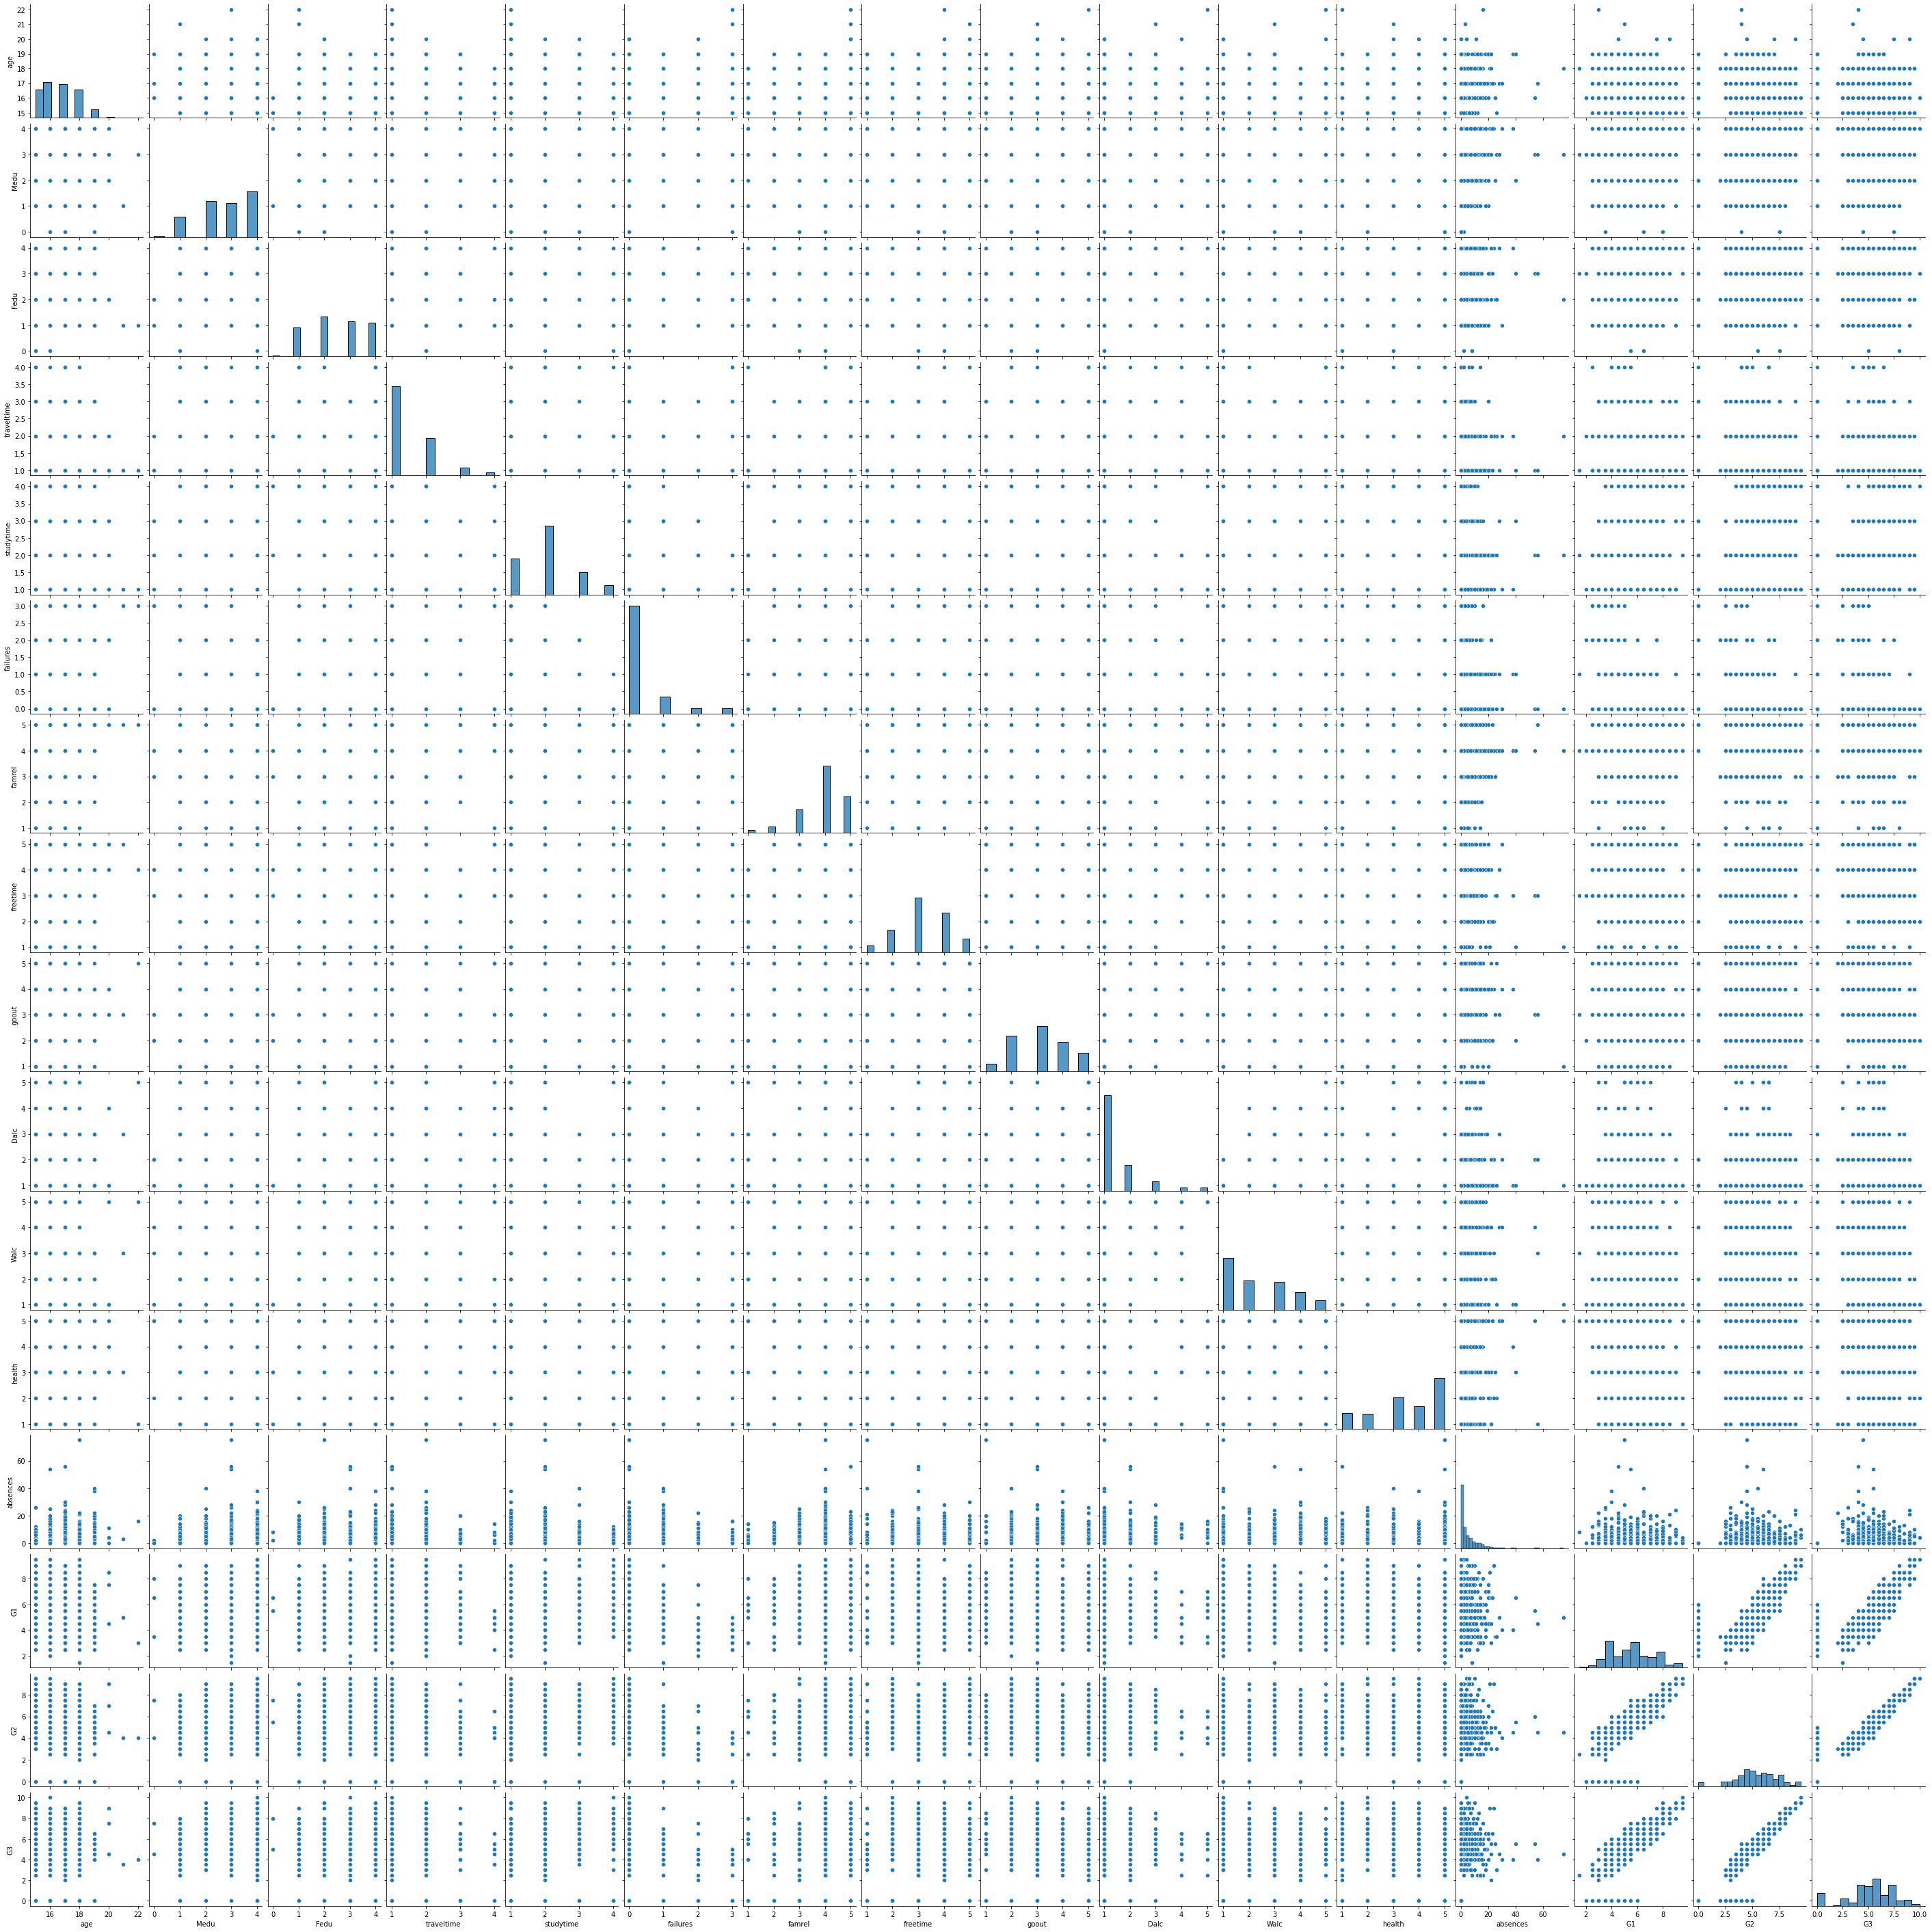

In [ ]:
plt.figure(figsize=(15,15))
sns.pairplot(datakaggle)

Al tener tantas columnas el grafico anterior es dificil de interpretar, pero a simple vista ninguna variable tiene relacion con otra, see hara un heatmap para ver esto con numeros

<AxesSubplot:>

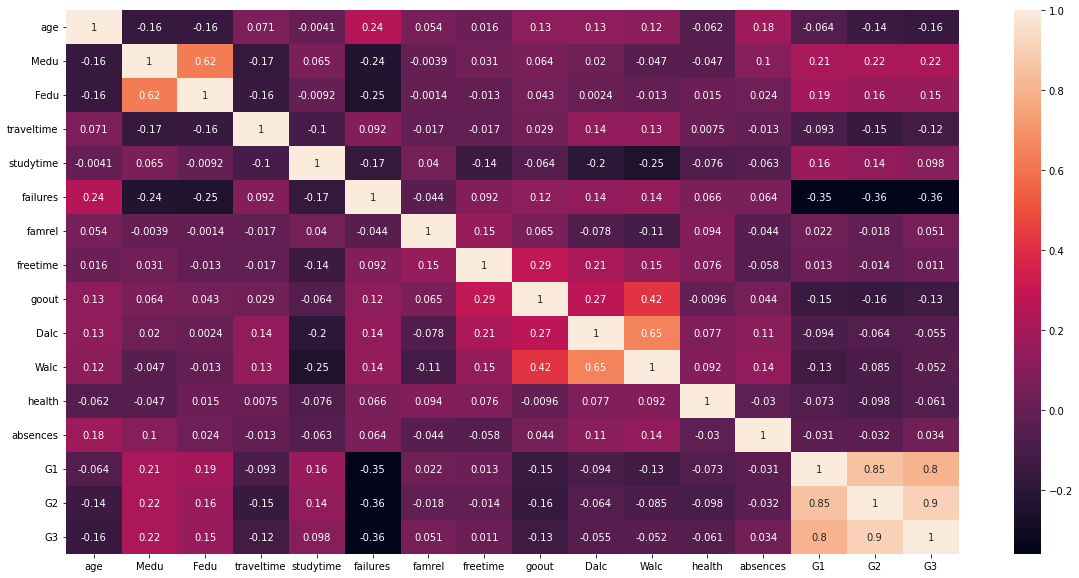

In [ ]:
correlacion = datakaggle.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlacion, annot=True)

Ahora si resulta mas facil pero, hay correlaciones negativas, lo cual si aportan valor pero si ponemos todas con el valor absoluto podremos ver la verdadera influencia de los datos sobre otros

<AxesSubplot:>

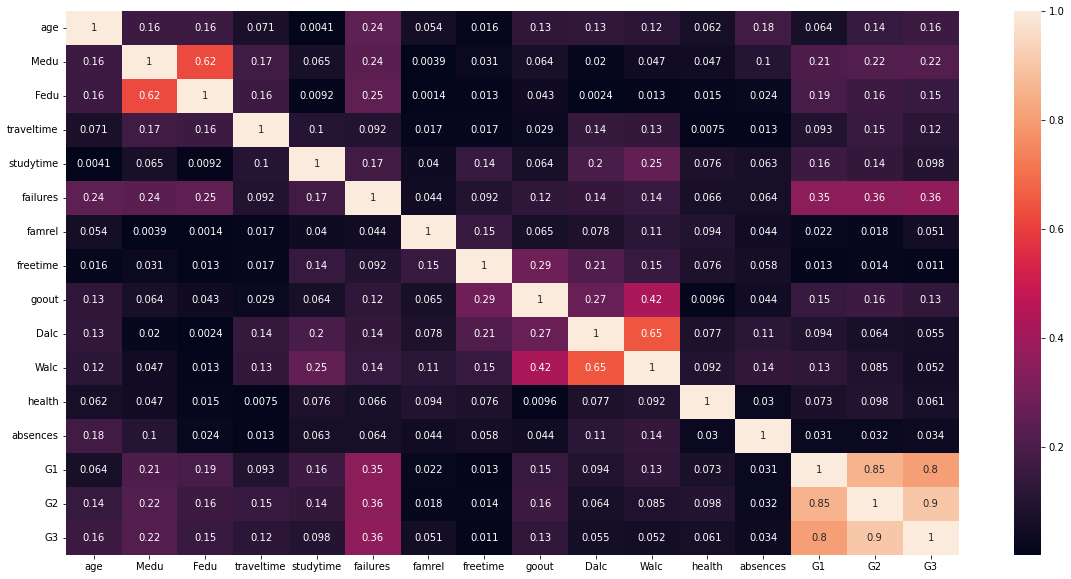

In [ ]:
correlacion = datakaggle.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlacion.abs(),annot = True)

La mayoria de las variables tienen una correlacion baja (sin contar las notas que claramente van a estar correlacionadas entre si), los fracasos si tienen una alta correlacion pero se desconoce que se quiere decir con fracaso exactamente

In [ ]:
G3 = datakaggle.corr().abs()
G3 = G3.loc[:,["G3"]]
G3.sort_values(ascending=False, by= "G3")

,G3
G3,1.000000
G2,0.904868
G1,0.801468
failures,0.360415
Medu,0.217147
age,0.161579
Fedu,0.152457
goout,0.132791
traveltime,0.117142
studytime,0.097820


Al observar la tabla anterior que extrae las correlaciones absolutas con la nota finnal, esta tiene alta correlacionada con los fracasos, la educacion de la madre, la edad y la educacion del padre, salida con amigos seguida del tiempo de llegada al colegio 

Es un poco controversial que la llegada al colegio y el tiempo de estudio no tenga tanta correlacion con la nota final a comparacion de salir con amigos

## sexo de estudiantes

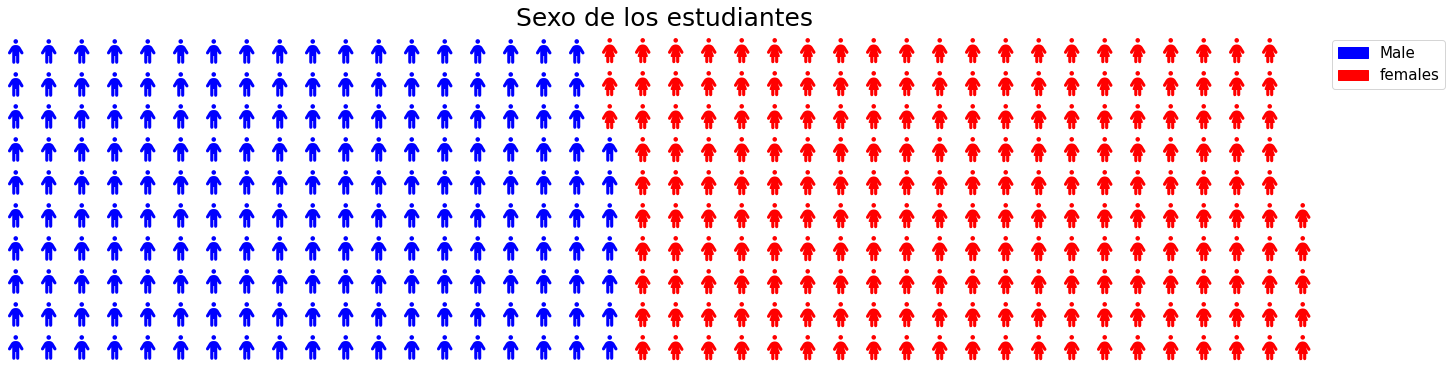

In [ ]:
""" ¿Cuantos estudiantes hay de cada sexo?
Normalmente en las escuelas hay mas niñas que niños, verificaremos esto en el dataset
"""
valores = {"Male": sum(datakaggle["sex"]=="M"), "females" : sum(datakaggle["sex"]=="F")}

plt.figure(
    FigureClass = Waffle,
    rows = 10,
    values = valores,
    legend={'bbox_to_anchor': (1.1, 1), 'fontsize': 15},
    icons = ["male",'female'],
    figsize=(20,20),
    font_size=25,
    colors = ["blue","red"]
    ) 

plt.title("Sexo de los estudiantes",fontsize=25)
plt.show() 

Como se puede observar, efectivamente hay mas niñas que niños en la escuela, ahora partiremos de esto pero en los dos tipos de area, rural/urbano

## Area de los estudiantes

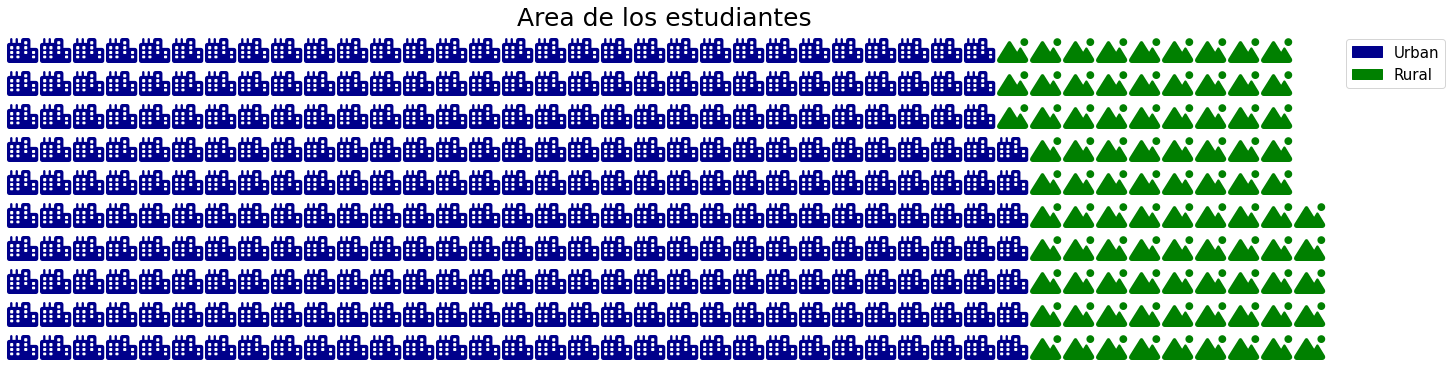

In [ ]:
""" ¿Cuantos estudiantes hay en cada area?
Se espera que haya mas estudiantes en el area urbana que en la rural
"""
valores = {"Urban": sum(datakaggle["address"]=="U"), "Rural" : sum(datakaggle["address"]=="R")}

plt.figure(
    FigureClass = Waffle,
    rows = 10,
    values = valores,
    legend={'bbox_to_anchor': (1.1, 1), 'fontsize': 15},
    icons = ["city",'mountain-sun'],
    figsize=(20,20),
    font_size=25,
    colors = ["#00008B","green"]
    ) 

plt.title("Area de los estudiantes",fontsize=25)
plt.show() 

Como se esperaba, la mayor parte de los estudinates estan en un entorno urbano


¿Cuantos estudiantes de cada sexo hay en cada area?
ya vimos que hay mas mujeres y mas estudiantes en la area urbana pero ¿Pasara estos si vemos cada sexo en que cada area?
se esperaria que haya mas niñas en el area urbana y mas niños en el area rural

## Estudiantes segun su sexo en cada area

### Tratado de datos

In [ ]:
sex_address = datakaggle.groupby(["address","sex"])[["school"]].count()
sex_address

school
address sex        
R       F        44
        M        44
U       F       164
        M       143

In [ ]:
sex_addressr = sex_address.reset_index()
sex_addressr 

,address,sex,school
0,R,F,44
1,R,M,44
2,U,F,164
3,U,M,143


In [ ]:
sex_addressr["address"] = sex_addressr["address"].apply(lambda x: "Urban" if x=="U" else "Rural")
sex_addressr["sex"] = sex_addressr["sex"].apply(lambda x: "Female" if x=="F" else "Male")

In [ ]:
sex_addressrn = sex_addressr.pivot(index='address', columns='sex')
sex_addressrn


school     
sex     Female Male
address            
Rural       44   44
Urban      164  143

### Grafico

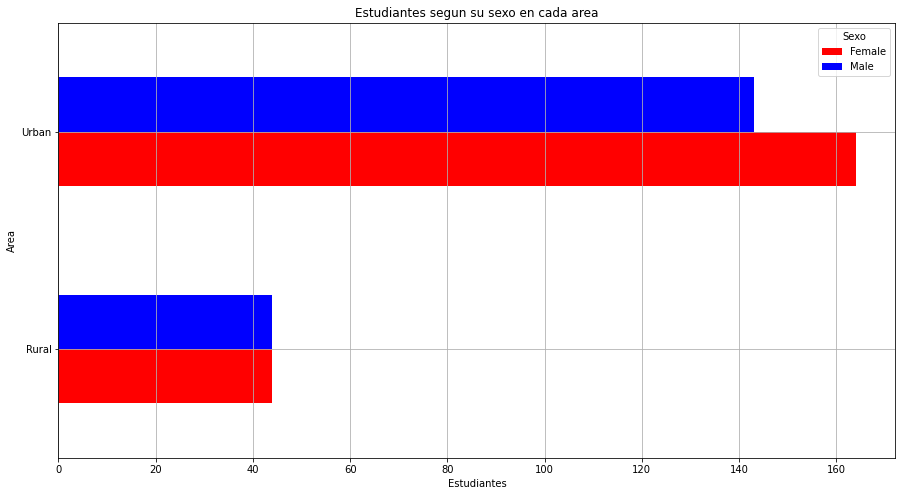

In [ ]:
sex_addressrn.plot(kind="barh",figsize=(15,8),color = ["red","blue"])
plt.title("Estudiantes segun su sexo en cada area")
plt.xlabel("Estudiantes")
plt.ylabel("Area")
plt.legend([sex_addressrn.columns[0][1], sex_addressrn.columns[1][1]],title="Sexo")
plt.grid()
plt.show()

Como era de esperarse, el numero de niñas en la zona urbana es superior al de los niños, pero en la zona rural se tiene el mismo numero de ni­ñas que de niños, lo cual si sorprende.

## Calificaciones en el area rural segun su sexo

### Tratado de datos

In [ ]:
rural = datakaggle[datakaggle["address"]=="R"]
rural

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
24,GP,F,15,R,GT3,T,2,4,services,health,...,4,3,2,1,1,5,2,5.0,4.5,4.0
32,GP,M,15,R,GT3,T,4,3,teacher,at_home,...,4,5,2,1,1,5,0,8.5,8.0,8.0
37,GP,M,16,R,GT3,A,4,4,other,teacher,...,2,4,3,1,1,5,7,7.5,8.0,7.5
38,GP,F,15,R,GT3,T,3,4,services,health,...,4,3,2,1,1,5,2,6.0,6.0,5.5
39,GP,F,15,R,GT3,T,2,2,at_home,other,...,4,3,1,1,1,2,8,7.0,6.5,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,MS,F,18,R,GT3,T,2,2,at_home,other,...,5,3,3,1,3,4,2,5.0,4.5,5.0
386,MS,F,18,R,GT3,T,4,4,teacher,at_home,...,4,4,3,2,2,5,7,3.0,2.5,3.0
387,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,0,3.5,2.5,0.0
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,5.0,4.0,3.5


In [ ]:
rural_grades = rural.groupby(["sex","G3"])[["school"]].count()
rural_grades

school
sex G3         
F   0.0       5
    2.5       2
    3.0       3
    3.5       2
    4.0       2
    4.5       1
    5.0      11
    5.5       8
    6.0       2
    6.5       4
    7.0       1
    8.0       1
    9.0       1
    9.5       1
M   0.0       5
    2.5       2
    3.5       4
    4.0       5
    4.5       2
    5.0       6
    5.5       2
    6.0       6
    6.5       3
    7.0       2
    7.5       3
    8.0       2
    8.5       1
    9.0       1

In [ ]:
rural_gradesr = rural_grades.reset_index()
rural_gradesr["sex"] = rural_gradesr["sex"].apply(lambda x: "Female" if x=="F" else "Male")
rural_gradesr 

,sex,G3,school
0,Female,0.0,5
1,Female,2.5,2
2,Female,3.0,3
3,Female,3.5,2
4,Female,4.0,2
5,Female,4.5,1
6,Female,5.0,11
7,Female,5.5,8
8,Female,6.0,2
9,Female,6.5,4


In [ ]:
rural_gradesr = rural_gradesr.pivot(index='G3', columns='sex')
rural_gradesr

school     
sex Female Male
G3             
0.0    5.0  5.0
2.5    2.0  2.0
3.0    3.0  NaN
3.5    2.0  4.0
4.0    2.0  5.0
4.5    1.0  2.0
5.0   11.0  6.0
5.5    8.0  2.0
6.0    2.0  6.0
6.5    4.0  3.0
7.0    1.0  2.0
7.5    NaN  3.0
8.0    1.0  2.0
8.5    NaN  1.0
9.0    1.0  1.0
9.5    1.0  NaN

In [ ]:
# se sustituye el nan de la grafica anterior por ceros. Esto pasa porque una categoria si tiene un dato pero la otra no
rural_gradesr.fillna(0,inplace=True)

### Grafico

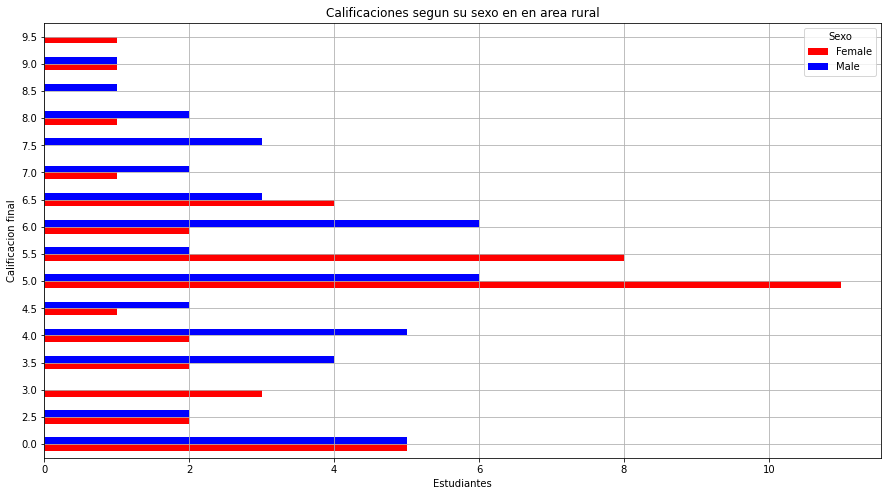

In [ ]:
rural_gradesr.plot(kind="barh",figsize=(15,8),color = ["red","blue"])
plt.title("Calificaciones segun su sexo en en area rural")
plt.xlabel("Estudiantes")
plt.ylabel("Calificacion final")
plt.legend([rural_gradesr.columns[0][1], rural_gradesr.columns[1][1]],title="Sexo")
plt.grid()
plt.show()

Al observar el grafico se puede ver que hay un gran numero de niñas con bajas notas a comparacion de los niños, hay que recordar que en esta area hay la misma cantidad de niños como de niñas



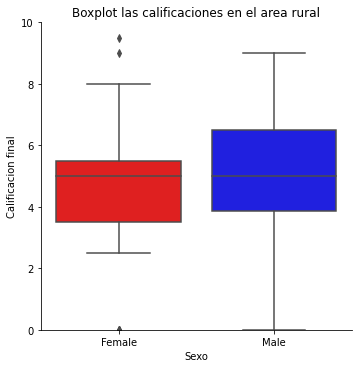

In [ ]:
rural["sex"] = rural["sex"].apply(lambda x: "Female" if x=="F" else "Male")
pal = {"Female":"red","Male":"blue"}
sns.catplot(data=rural, x="sex", y="G3", kind="box",palette=pal)
plt.title("Boxplot las calificaciones en el area rural")
plt.xlabel("Sexo")
plt.ylabel("Calificacion final")
plt.ylim(0,10)
plt.show()

Al ver el boxplot lo cambia o nos da una perspeccion diferente a la grafica de barras. Los niños tienen una mejor nota que las niñas por el Q3 y Q4, no obstante, los niños tienen una mayor dispersion de califcaciones que van desde 0 hasta el 9, pero la nota mas altas corresponden a las niñas con 9.5, el cual es el "outlier". 

ahora veremos si pasa lo mismo en la zona urbana

In [ ]:
print(rural[rural["sex"]=="Female"]["G3"].median())
print(rural[rural["sex"]=="Male"]["G3"].median())
print("quantiles niñas")
print(rural[rural["sex"]=="Female"]["G3"].quantile([0,.25,0.5,0.75,1]))
print("quantiles niños")
print(rural[rural["sex"]=="Male"]["G3"].quantile([.25,0.5,0.75,1]))


5.0
5.0
quantiles niñas
0.00    0.0
0.25    3.5
0.50    5.0
0.75    5.5
1.00    9.5
Name: G3, dtype: float64
quantiles niños
0.25    3.875
0.50    5.000
0.75    6.500
1.00    9.000
Name: G3, dtype: float64


El quantile 1 o el Q4 da como resultado un outlier, es mas confiable la grafica o algo no concuerda entre la grafica y la funcion, parece ser que la funcion incluye los datos fuera del bigote

## Calificaciones en el area urbana segun su sexo

### Tratado de datos

In [ ]:
urbana = datakaggle[datakaggle["address"]=="U"]
urbana

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,2.5,3.0,3.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,2.5,2.5,3.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,3.5,4.0,5.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,7.5,7.0,7.5
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,3.5,4.5,4.0
389,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,3.0,2.5,0.0
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,4.5,4.5,4.5
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,7.0,8.0,8.0


In [ ]:
urbana_grades = urbana.groupby(["sex","G3"])[["school"]].count()
urbana_grades

school
sex G3          
F   0.0       18
    2.0        1
    2.5        1
    3.0       10
    3.5        2
    4.0       12
    4.5       16
    5.0       19
    5.5       21
    6.0        9
    6.5       13
    7.0       13
    7.5       16
    8.0        5
    8.5        3
    9.0        4
    9.5        1
M   0.0       10
    2.5        2
    3.0        2
    3.5        1
    4.0       13
    4.5        9
    5.0       20
    5.5       16
    6.0       14
    6.5       11
    7.0       11
    7.5       14
    8.0        8
    8.5        2
    9.0        6
    9.5        3
    10.0       1

In [ ]:
urbana_gradesr = urbana_grades.reset_index()
urbana_gradesr["sex"] = urbana_gradesr["sex"].apply(lambda x: "Female" if x=="F" else "Male")
urbana_gradesr 

,sex,G3,school
0,Female,0.0,18
1,Female,2.0,1
2,Female,2.5,1
3,Female,3.0,10
4,Female,3.5,2
5,Female,4.0,12
6,Female,4.5,16
7,Female,5.0,19
8,Female,5.5,21
9,Female,6.0,9


In [ ]:
urbana_gradesr = urbana_gradesr.pivot(index='G3', columns='sex')
urbana_gradesr

school      
sex  Female  Male
G3               
0.0    18.0  10.0
2.0     1.0   NaN
2.5     1.0   2.0
3.0    10.0   2.0
3.5     2.0   1.0
4.0    12.0  13.0
4.5    16.0   9.0
5.0    19.0  20.0
5.5    21.0  16.0
6.0     9.0  14.0
6.5    13.0  11.0
7.0    13.0  11.0
7.5    16.0  14.0
8.0     5.0   8.0
8.5     3.0   2.0
9.0     4.0   6.0
9.5     1.0   3.0
10.0    NaN   1.0

In [ ]:
# se sustituye el nan de la grafica anterior por ceros. Esto pasa porque una categoria si tiene un dato pero la otra no
urbana_gradesr.fillna(0,inplace=True)

### Grafico

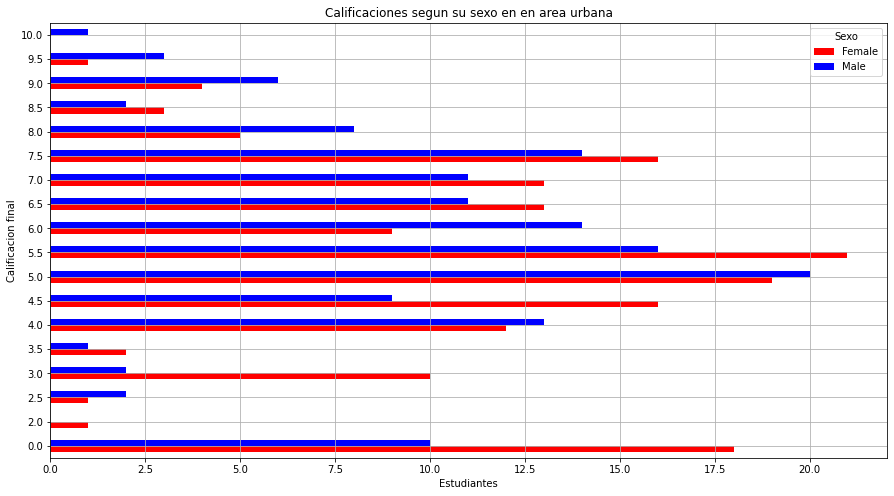

In [ ]:
urbana_gradesr.plot(kind="barh",figsize=(15,8),color = ["red","blue"])
plt.title("Calificaciones segun su sexo en en area urbana")
plt.xlabel("Estudiantes")
plt.ylabel("Calificacion final")
plt.legend([urbana_gradesr.columns[0][1], urbana_gradesr.columns[1][1]],title="Sexo")
plt.grid()
plt.show()

Al igual que en la zona rural, las niñas tienden a tener menor calificacion, no obstante, las niñas tienen la nota mas alta en la zona rural mientras que los niños la tienen en la zona urbana

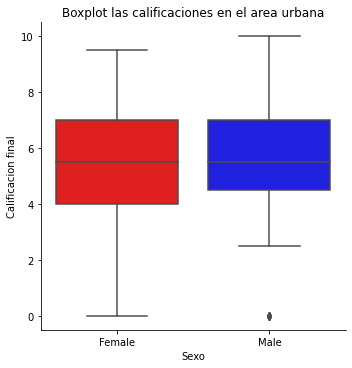

In [ ]:
urbana["sex"] = urbana["sex"].apply(lambda x: "Female" if x=="F" else "Male")
pal = {"Female":"red","Male":"blue"}
sns.catplot(data=urbana, x="sex", y="G3", kind="box",palette=pal)
plt.title("Boxplot las calificaciones en el area urbana")
colors = ['red', 'blue']
plt.xlabel("Sexo")
plt.ylabel("Calificacion final")
plt.show()

Al obervar el boxplot, las niñas tienen las calificaciones mas bajas que los niños por el Q1, pero pasa lo contarario que en la zona rural, los niños en la zona rural tienen una mayor distribucion de datos mientras que en la zona rural tienen mayor distribucion las niñas

## Tutores de los estudiantes

Una vez analizados los estudiantes con respecto a sus notas y segun su area, ahora los analizaremos con sus tutores, como vimos en la correlacion, esto influye en la nota de los estudiantes debido al grado de la madre, por lo que se esperaria que los estudiantes tengan de tutor a la madre

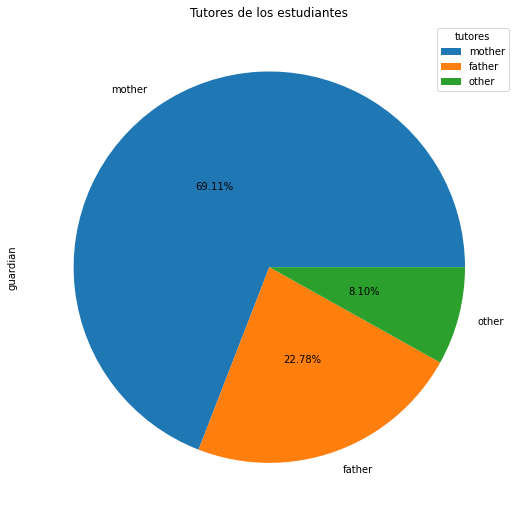

In [ ]:
datakaggle["guardian"].value_counts().plot(kind="pie", subplots=True, figsize=(9,9),autopct='%.2f%%', legend=False,pctdistance=.5)
plt.title("Tutores de los estudiantes")
plt.legend(loc="upper right",title="tutores")
plt.show()

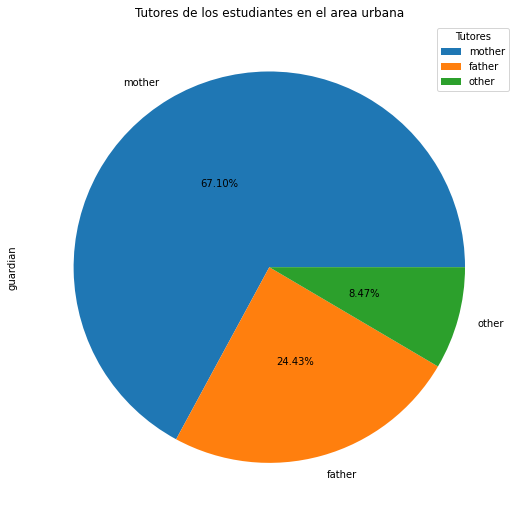

In [ ]:
urbana["guardian"].value_counts().plot(kind="pie", subplots=True, figsize=(9,9),autopct='%.2f%%', legend=False,pctdistance=.5)
plt.title("Tutores de los estudiantes en el area urbana")
plt.legend(loc="upper right",title="Tutores")
plt.show()

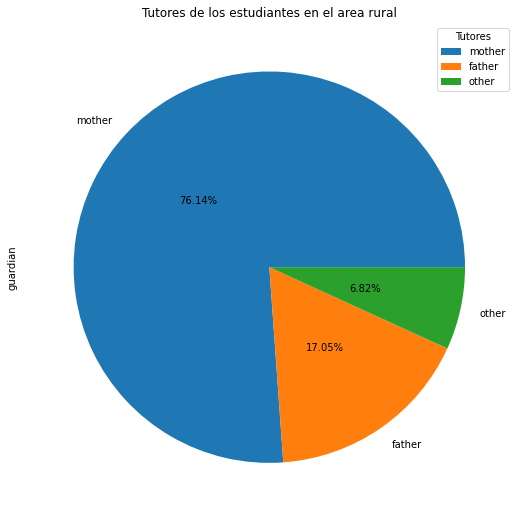

In [ ]:
rural["guardian"].value_counts().plot(kind="pie", subplots=True, figsize=(9,9),autopct='%.2f%%', legend=False,pctdistance=.5)
plt.title("Tutores de los estudiantes en el area rural")
plt.legend(loc="upper right",title="Tutores")
plt.show()

Al observar los graficos, es indiscutible que las mamás son las tutoras de los estudiantes en cualquiera de las areas, en la zona rural se puede entender porque la carga del trabajo la lleva el varon, mientras que en la zona urbana esto es indistinto, y se puede observar como el porcentade de padres crece un 7% aproximadamente  

## Estudiantes con calificacion aprobatoria y no aprobatorias
Se examinaran a los estudiantes que aprueban la nota final con los factores que pueden perjudicar esta nota 

### Tratado de datos

In [ ]:
aprobatoria=datakaggle.copy()

In [ ]:
aprobatoria = aprobatoria[aprobatoria["G3"]>=6] 

In [ ]:
aprobatoria

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,7.5,7.0,7.5
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,7.5,7.5,7.5
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,8.0,9.0,9.5
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,7.0,7.5,7.5
11,GP,F,15,U,GT3,T,2,1,services,other,...,5,2,2,1,1,4,4,5.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,MS,F,18,R,LE3,T,4,4,other,other,...,5,4,4,1,1,1,0,9.5,9.0,9.5
376,MS,F,20,U,GT3,T,4,2,health,other,...,5,4,3,1,1,3,4,7.5,7.0,7.5
378,MS,F,18,U,GT3,T,3,3,other,other,...,4,1,3,1,2,1,0,7.5,7.5,7.5
380,MS,M,18,U,GT3,T,4,4,teacher,teacher,...,3,2,4,1,4,2,4,7.5,7.0,7.0


In [ ]:
no_aprobatoria=datakaggle.copy()
no_aprobatoria = no_aprobatoria[no_aprobatoria["G3"]<6] 

In [ ]:
no_aprobatoria

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,2.5,3.0,3.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,2.5,2.5,3.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,3.5,4.0,5.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,3.0,5.0,5.0
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,6.0,6.0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,3.0,2.5,0.0
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,4.5,4.5,4.5
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,5.0,4.0,3.5
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,5.5,6.0,5.0


### Graficacion con respecto al grado de estudios de la madre

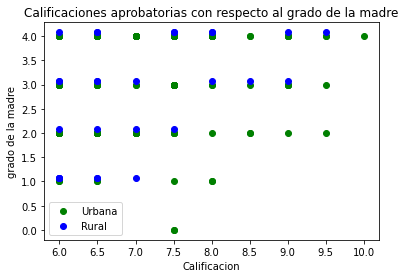

In [ ]:
x = aprobatoria["Medu"][aprobatoria['address']=="U"]
y = aprobatoria["G3"][aprobatoria['address']=="U"]
plt.scatter(y, x,color = "green",alpha=1)
x = aprobatoria["Medu"][aprobatoria['address']=="R"]+.08
y = aprobatoria["G3"][aprobatoria['address']=="R"]
plt.scatter(y, x, color = "blue",alpha=1)
plt.title("Calificaciones aprobatorias con respecto al grado de la madre")
plt.xlabel("Calificacion")
plt.ylabel("grado de la madre")
plt.legend(["Urbana" , "Rural"])
plt.show()

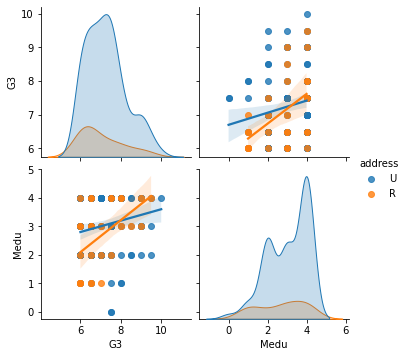

In [ ]:
aprobatoria2 = aprobatoria[["address","G3","Medu"]]
sns.pairplot(aprobatoria2, kind="reg", hue="address")

In [ ]:
print(aprobatoria2[aprobatoria2["address"]=="U"].corr())
print(aprobatoria2[aprobatoria2["address"]=="R"].corr())

            G3      Medu
G3    1.000000  0.189402
Medu  0.189402  1.000000
            G3      Medu
G3    1.000000  0.497803
Medu  0.497803  1.000000


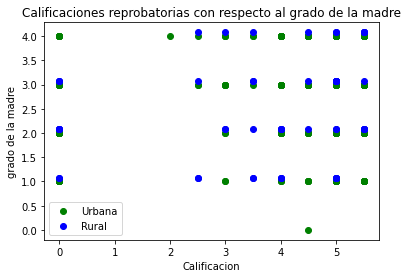

In [ ]:
x = no_aprobatoria["Medu"][no_aprobatoria['address']=="U"]
y = no_aprobatoria["G3"][no_aprobatoria['address']=="U"]
plt.scatter(y, x,color = "green",alpha=1)
x = no_aprobatoria["Medu"][no_aprobatoria['address']=="R"]+.08
y = no_aprobatoria["G3"][no_aprobatoria['address']=="R"]
plt.scatter(y, x, color = "blue",alpha=1)
plt.title("Calificaciones reprobatorias con respecto al grado de la madre")
plt.xlabel("Calificacion")
plt.ylabel("grado de la madre")
plt.legend(["Urbana" , "Rural"])
plt.show()

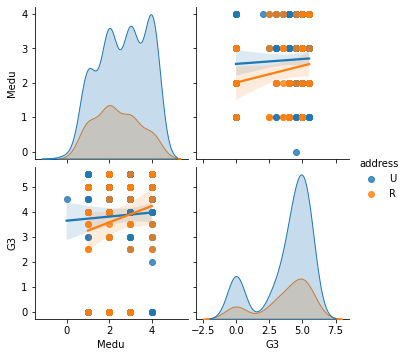

In [ ]:
no_aprobatoria2 = no_aprobatoria[["Medu","G3","address"]]
sns.pairplot(no_aprobatoria2, kind="reg", hue="address")

In [ ]:
print(no_aprobatoria2[no_aprobatoria2["address"]=="U"].corr())
print(no_aprobatoria2[no_aprobatoria2["address"]=="R"].corr())

          Medu        G3
Medu  1.000000  0.048092
G3    0.048092  1.000000
          Medu        G3
Medu  1.000000  0.178689
G3    0.178689  1.000000


Con las calificaicones aprobatorias se puede ver como hay una tendencia en la zona urbana a las calificaicones mas altas y se podria decir que hay un outlier con el estudinate que saco cero por lo mismo. La zona rural esta mas correlacionada con las en cuestion al grado de la madre y la calicacion no aprobatoria

### Graficacion segun distancia

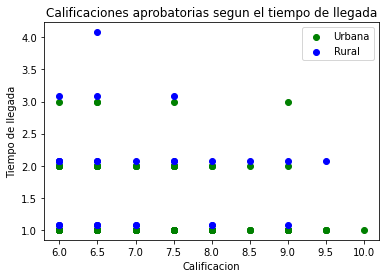

In [ ]:
x = aprobatoria["traveltime"][aprobatoria['address']=="U"]
y = aprobatoria["G3"][aprobatoria['address']=="U"]
plt.scatter(y, x,color = "green",alpha=1)
x = aprobatoria["traveltime"][aprobatoria['address']=="R"]+.08
y = aprobatoria["G3"][aprobatoria['address']=="R"]
plt.scatter(y, x, color = "blue",alpha=1)
plt.title("Calificaciones aprobatorias segun el tiempo de llegada")
plt.xlabel("Calificacion")
plt.ylabel("Tiempo de llegada")
plt.legend(["Urbana" , "Rural"])
plt.show()

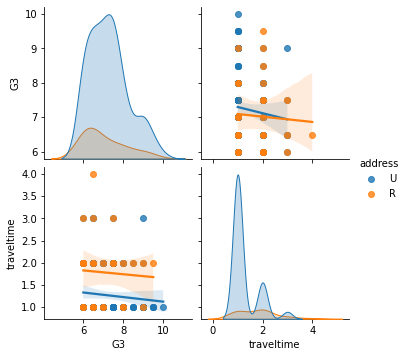

In [ ]:
aprobatoria2 = aprobatoria[["address","G3","traveltime"]]
sns.pairplot(aprobatoria2, kind="reg", hue="address")

In [ ]:
print("zona urbana")
print(aprobatoria2[aprobatoria2["address"]=="U"].corr())
print("zona rural")
print(aprobatoria2[aprobatoria2["address"]=="R"].corr())

zona urbana
                  G3  traveltime
G3          1.000000   -0.095931
traveltime -0.095931    1.000000
zona rural
                  G3  traveltime
G3          1.000000   -0.057451
traveltime -0.057451    1.000000


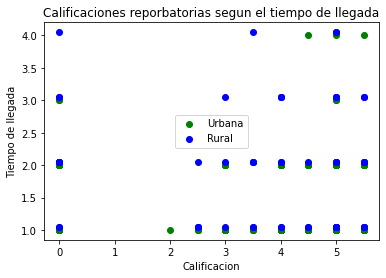

In [ ]:
x = no_aprobatoria["traveltime"][no_aprobatoria['address']=="U"]
y = no_aprobatoria["G3"][no_aprobatoria['address']=="U"]
plt.scatter(y, x,color = "green",alpha=1)
x = no_aprobatoria["traveltime"][no_aprobatoria['address']=="R"]+.05
y = no_aprobatoria["G3"][no_aprobatoria['address']=="R"]
plt.scatter(y, x, color = "blue",alpha=1)
plt.title("Calificaciones reporbatorias segun el tiempo de llegada")
plt.xlabel("Calificacion")
plt.ylabel("Tiempo de llegada")
plt.legend(["Urbana" , "Rural"],loc="center")
plt.show()

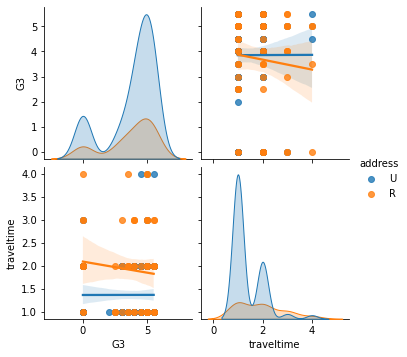

In [ ]:
no_aprobatoria2 = no_aprobatoria[["address","G3","traveltime"]]
sns.pairplot(no_aprobatoria2, kind="reg", hue="address")

In [ ]:
print("zona urbana")
print(no_aprobatoria2[no_aprobatoria2["address"]=="U"].corr())
print("zona rural")
print(no_aprobatoria2[no_aprobatoria2["address"]=="R"].corr())

zona urbana
                 G3  traveltime
G3          1.00000     0.00125
traveltime  0.00125     1.00000
zona rural
                  G3  traveltime
G3          1.000000   -0.097886
traveltime -0.097886    1.000000


Al ver los datos no nos da un indicio de que el tiempo de traslado pueda afectar la nota, por lo cual se pasara a las horas dedicadas al estudio. En la zona urbana con las califaciones aprobatorias se puede ver que hay una correlacion negativa, esto quiere decir que mientras mas lejos viva menor sera su nota y lo mismo pasa con las calificaicones repobatorias en la zona rural

### Graficaicon segun horas de estudio

In [ ]:
hrs = datakaggle.copy()

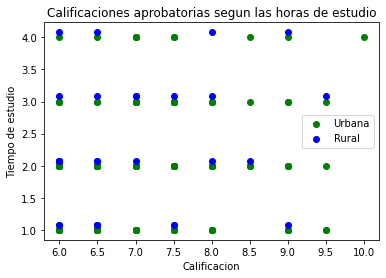

In [ ]:
x = aprobatoria["studytime"][aprobatoria['address']=="U"]
y = aprobatoria["G3"][aprobatoria['address']=="U"]
plt.scatter(y, x,color = "green",alpha=1)
x = aprobatoria["studytime"][aprobatoria['address']=="R"]+.08
y = aprobatoria["G3"][aprobatoria['address']=="R"]
plt.scatter(y, x, color = "blue",alpha=1)
plt.title("Calificaciones aprobatorias segun las horas de estudio")
plt.xlabel("Calificacion")
plt.ylabel("Tiempo de estudio")
plt.legend(["Urbana" , "Rural"])
plt.show()

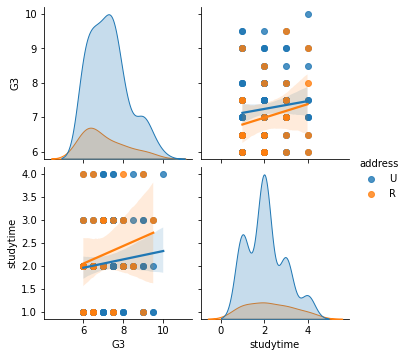

In [ ]:
aprobatoria2 = aprobatoria[["address","G3","studytime"]]
sns.pairplot(aprobatoria2, kind="reg", hue="address")

In [ ]:
print("zona urbana")
print(aprobatoria2[aprobatoria2["address"]=="U"].corr())
print("zona rural")
print(aprobatoria2[aprobatoria2["address"]=="R"].corr())

zona urbana
                 G3  studytime
G3         1.000000   0.101663
studytime  0.101663   1.000000
zona rural
                 G3  studytime
G3         1.000000   0.194224
studytime  0.194224   1.000000


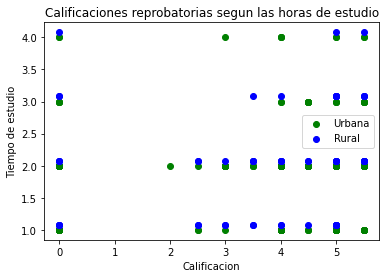

In [ ]:
x = no_aprobatoria["studytime"][no_aprobatoria['address']=="U"]
y = no_aprobatoria["G3"][no_aprobatoria['address']=="U"]
plt.scatter(y, x,color = "green",alpha=1)
x = no_aprobatoria["studytime"][no_aprobatoria['address']=="R"]+.08
y = no_aprobatoria["G3"][no_aprobatoria['address']=="R"]
plt.scatter(y, x, color = "blue",alpha=1)
plt.title("Calificaciones reprobatorias segun las horas de estudio")
plt.xlabel("Calificacion")
plt.ylabel("Tiempo de estudio")
plt.legend(["Urbana" , "Rural"],loc="right")
plt.show()

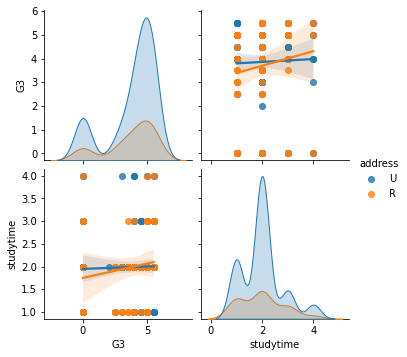

In [ ]:
no_aprobatoria2 = no_aprobatoria[["address","G3","studytime"]]
sns.pairplot(no_aprobatoria2, kind="reg", hue="address")

In [ ]:
print("zona urbana")
print(no_aprobatoria2[no_aprobatoria2["address"]=="U"].corr())
print("zona rural")
print(no_aprobatoria2[no_aprobatoria2["address"]=="R"].corr())

zona urbana
                 G3  studytime
G3         1.000000   0.025185
studytime  0.025185   1.000000
zona rural
                 G3  studytime
G3         1.000000   0.139499
studytime  0.139499   1.000000


En la zona rural como en la urbana (a excepcion de los no aprobados en esta ultima zona ) la correlacion es positiva entre las horas de estudio y la calificacion

## Conclusiones

En este dataset una de las prinipales causas de las notas de los estudiantes independientemente del area o del genero es el grado de estudios de sus madres, pues ellas son en su mayoria las tutoras de los estudiantes, lo cual quiere decir que el grado academico o el nivel de cada uno de los estudinates es gracias a ella.

Si sorprendio que haya el mismo numero de estudinates en el area rural, pero las notas mas bajas corresponden a las niñas aunque tambien las notas mas altas aunque sean outliers, por otro lado, en ela rea urbana los niños son los que tienen una calificacion mas alta, siendo estos un grupo reducido a comparacion de las niñas.

